# FC Farcelona - Footbal Manager

# Team:
| Name | Student Number | E-mail |
|------|----------------|--------|
| Mallika Tripathi  | 5691753 |  m.tripathi-2@student.tudelft.nl |
| Christian Vorage | 4667905 |  c.v.m.m.vorage@student.tudelft.nl |
| Petar Velchev | 4349253 |  p.velchev@student.tudelft.nl |
| Givani Boekestijn | 4710193 |  g.l.m.boekestijn@student.tudelft.nl |


## Downloading & Loading Data

In [ ]:
# Download json file with data from personal drive
# UPDATED FILE:  1LZEEQLm3QSQNwshJ3kGg_TSiQD03Ua5K
# ORIGINAL FILE: 1EPjLlaSk5no9X_lJL9BbEVERg2m43nMQ

!gdown 1LZEEQLm3QSQNwshJ3kGg_TSiQD03Ua5K

Downloading...
From: https://drive.google.com/uc?id=1LZEEQLm3QSQNwshJ3kGg_TSiQD03Ua5K
To: /content/project_4_data_v2.txt
100% 1.22M/1.22M [00:00<00:00, 32.4MB/s]


In [ ]:
import json
with open("/content/project_4_data_v2.txt", 'r') as handle:
     contents = json.loads(handle.read())

In [ ]:
# Create Player Class:
class Player:
  def __init__(self, player):
    self.name = player['name']
    self.position = player['position']
    self.history = []
    for i in player['history']:
      history_dict = {'age': i['age'],
                      'value': i['value'],
                      'date': i['date'],
                      'team': i['team']}
      self.history.append(history_dict)

## Visualizing Data

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def plot_player_overview(player):
  values_list = []
  dates_list = []
  age_list = []
  teams_list = []
  transfer_list = []
  last_club = player.history[0]['team']
  last_value = player.history[0]['value']
  last_date = datetime.strptime(player.history[0]['date'], '%b %d, %Y')

  for i in player.history:
    # Add items to lists
    values_list.append(i['value'])
    age_list.append(i['age'])
    dates_list.append(datetime.strptime(i['date'], '%b %d, %Y'))
    teams_list.append(i['team'])
    if last_club != i['team']:
      transfer = np.array([[last_date,  datetime.strptime(i['date'], '%b %d, %Y')],
                          [last_value,  i['value'] ],
                          [last_club,   i['team']]])
      transfer_list.append(transfer)
    # Save last parameters
    last_club = i['team']
    last_value = i['value']
    last_date = datetime.strptime(i['date'], '%b %d, %Y')

  # Create player plot:
  plt.figure(figsize=(14,6))
  plt.plot(dates_list,values_list)
  plt.scatter(dates_list, values_list, c=age_list, cmap='viridis')
  plt.text(x=15000, y=20000000, s=player.position, fontsize=20, bbox=dict(facecolor='red', alpha=0.2))
  legend_entry_list = ["Value over Time", "Age as color"]
  for transfer in transfer_list:
    plt.plot(transfer[0,:], transfer[1,:], '--', linewidth=3.0)
    legend_entry_list.append(f"Transfer: {transfer[2,0]} --> {transfer[2,1]}")
  plt.legend(legend_entry_list)
  plt.title(f"{player.name} Information")
  plt.xlabel("Year")
  plt.ylabel("Value in Euro's")
  clb=plt.colorbar()
  clb.ax.tick_params(labelsize=10)
  clb.ax.set_title('Age',fontsize=10)
  plt.savefig(f'{player.name}.png')
  plt.show()

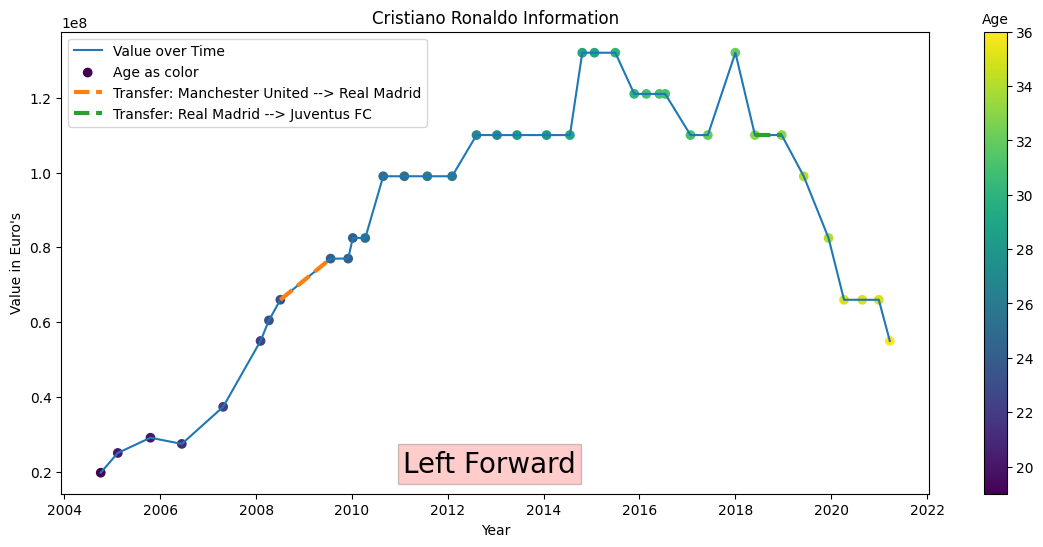

In [ ]:
#Mbappe:1, Cristiano:101, Frenkie:18, Messi:19
player = Player(contents[101])
plot_player_overview(player)

##  More Stuff

In [ ]:
# Use to inspect all players names:
# player_list = []
# i = 0
# for elem in contents:
#   print(elem['name']) #%% = Player(elem)
#   if elem['name'] == 'Cristiano Ronaldo':
#     print(i)
#   player_list.append(Player(elem))
#   i = i+1


## Problem Description

- Amount of roles: 10
- Amount of players for each role: 2
- Total amount of players: 20
- Time horizon: $T=8$ years
- Budget: $b_0>0$
- Final Value at time $T$: $b_T$

## Problem Insights

- Go back in time, from finish to start, and find the players for each position at least two, that showed the highest procential increase in value
- Devide the years into for example: events ∈ [last value in 2020, last value in 2021]
- We assume that budget constraint will be heavy enough that the highest procentual increase in value of players will be the optimal policy

## Create Events Database

In [ ]:
import pandas as pd
from IPython.display import display
year = 2020

def get_oppertunites_df(year, contents):
  counter = 0;
  # Create dataframe, specifically index size is very small
  df = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price'], index=[np.arange(0,5)])
  for i in contents:
    years = []
    values = []
    for ii in i['history']:
      years.append(datetime.strptime(ii['date'], '%b %d, %Y').year)
      values.append(ii['value'])
    years.reverse()
    try:
      # Try to grab the data for the desired year for a player
      idx_start = len(years) -  years.index(year-1) - 1
      idx_end = len(years) -  years.index(year) - 1
    except:
      # If it doesn't exist skip player
      continue
    delta_price = values[idx_end] - values[idx_start]
    try:
      # Try to calculate the DPP, but forget about player if he didn't have a value last year
      delta_percentage_price = (values[idx_end] - values[idx_start]) / values[idx_start]
    except:
      continue
    df.loc[counter,['name','position','price_start','price_finish','delta_percentage_price']] = [i['name'], i['position'], values[idx_start], values[idx_end], delta_percentage_price]
    counter = counter + 1;
  return df

opp_df = get_oppertunites_df(year, contents)
display(opp_df)

,name,position,price_start,price_finish,delta_percentage_price
0,Kylian Mbappé,Centre Forward,220000000,198000000,-0.1
1,Neymar,Left Forward,176000000,140800000,-0.2
2,Harry Kane,Centre Forward,165000000,132000000,-0.2
3,Erling Haaland,Centre Forward,49500000,110000000,1.222222
4,Mohamed Salah,Right Forward,165000000,132000000,-0.2
...,...,...,...,...,...
489,Hans Hateboer,Right Back,16500000,19800000,0.2
490,Nemanja Maksimovic,Centre Midfield,22000000,22000000,0.0
491,Issa Diop,Centre Back,38500000,22000000,-0.428571
492,Ayoze Pérez,Left Forward,33000000,22000000,-0.333333


In [ ]:
def get_best_opps(opp_df):
  pos_list = ['Left Forward', 'Centre Forward', 'Right Forward',
              'Left Midfield', 'Centre Midfield', 'Right Midfield',
              'Left Back', 'Centre Back', 'Right Back',
                                'Goalkeeper']
  best_opps = pd.DataFrame(columns=['name','position','price_start','price_finish','delta_percentage_price'], index=None)
  counter = 1
  for idx, pos in enumerate(pos_list):
    opp_df_pos = opp_df[opp_df['position'] == pos]
    opp_df_pos_ordered = opp_df_pos.sort_values(by=['delta_percentage_price'], ascending=False)
    best_opp = opp_df_pos_ordered.iloc[:2]
    if idx == 1:
      # Do not append
      continue
    else:
      # best_opps = best_opps.append(best_opp)
      best_opps = pd.concat([best_opps, best_opp])

  return best_opps

best_opps_df = get_best_opps(opp_df)
display(best_opps_df)

,name,position,price_start,price_finish,delta_percentage_price
"(156,)",Pedro Neto,Left Forward,7700000,29700000,2.857143
"(357,)",Saïd Benrahma,Left Forward,8800000,24200000,1.75
"(298,)",Daniel Podence,Right Forward,6600000,27500000,3.166667
"(265,)",Gabriel Veron,Right Forward,7700000,27500000,2.571429
"(132,)",Tomas Soucek,Left Midfield,11000000,33000000,2.0
"(170,)",Manuel Locatelli,Left Midfield,14300000,38500000,1.692308
"(155,)",Jude Bellingham,Centre Midfield,2750000,29700000,9.8
"(213,)",Curtis Jones,Centre Midfield,2200000,18700000,7.5
"(353,)",Christoph Baumgartner,Right Midfield,2200000,19800000,8.0
"(407,)",Matteo Pessina,Right Midfield,3300000,16500000,4.0


In [ ]:
from tqdm import tqdm
year_range = np.arange(2011,2021)

def get_best_policy(contents,year_range):
  year_list = np.flip(year_range)
  policy = list()
  for year in tqdm(year_list):
    opps_df = get_oppertunites_df(year, contents)
    best_opps_df = get_best_opps(opps_df)
    policy.append(best_opps_df)
  policy.reverse()
  return policy

policy = get_best_policy(contents, year_range)


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


In [ ]:
print(policy[0])


                          name         position price_start price_finish  \
(4,)             Heung-min Son     Left Forward     1650000      4950000   
(17,)          Lorenzo Insigne     Left Forward      302500       660000   
(1,)             Mohamed Salah    Right Forward       27500       330000   
(48,)              Lucas Moura    Right Forward     1980000     11000000   
(8,)                  Casemiro    Left Midfield     1100000      8250000   
(58,)             Granit Xhaka    Left Midfield      440000      2750000   
(62,)  Alex Oxlade-Chamberlain  Centre Midfield      275000      6600000   
(59,)         Jordan Henderson  Centre Midfield     4400000     14300000   
(27,)        Christian Eriksen   Right Midfield     3300000      9900000   
(34,)          James Rodríguez   Right Midfield     4950000     10670000   
(37,)              Alex Sandro        Left Back     1320000      7480000   
(44,)       Nicolás Tagliafico        Left Back       55000       110000   
(14,)       

### Policy: Maximize Rate of Return

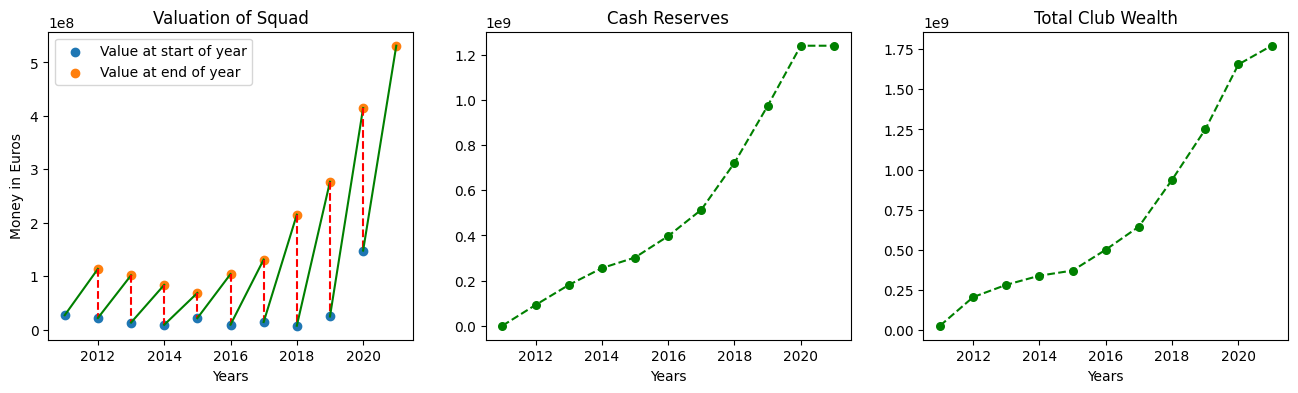

In [19]:
### Find initial budget needed for this policy:
values = np.zeros((len(policy),2))
balance = np.zeros((len(policy)))
for idx, yearly_policy in enumerate(policy):
  values[idx,0] = sum(yearly_policy['price_start'])
  values[idx,1] = sum(yearly_policy['price_finish'])

for i in range(len(balance)):
  if i == 0:
    balance[i] = 0
  elif 1<=i<=9:
    balance[i] = balance[i-1] + values[i-1,1] - values[i,0]
  else:
    balance[i] = balance[i-1] + values[i-1,1]

player_values_start = []
player_values_end = []
player_dates_start = []
player_dates_end = []
for idx, year in enumerate(year_range):
  player_values_start.append(values[idx,0])
  player_dates_start.append(year)
  player_values_end.append(values[idx,1])
  player_dates_end.append(year+1)


import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.scatter(player_dates_start, player_values_start)
plt.scatter(player_dates_end, player_values_end)
for i in range(len(year_range)):
  plt.plot( [player_dates_start[i], player_dates_end[i]], [player_values_start[i], player_values_end[i]], 'g-')
  if i==9:
    continue
  plt.plot( [player_dates_end[i], player_dates_start[i+1]], [player_values_end[i], player_values_start[i+1]], 'r--')
plt.legend(["Value at start of year", "Value at end of year"])
plt.title("Valuation of Squad")
plt.ylabel('Money in Euros')
plt.xlabel('Years')

plt.subplot(1, 3, 2)
plt.title("Cash Reserves")
plt.scatter(np.append(year_range, year_range[-1]+1), np.append(balance, balance[-1]), 30,'g')
plt.plot(np.append(year_range, year_range[-1]+1), np.append(balance, balance[-1]), 'g--')
plt.xlabel('Years')


plt.subplot(1, 3, 3)
plt.title("Total Club Wealth")
plt.xlabel('Years')
plt.scatter(np.append(year_range, year_range[-1]+1), np.append(balance, balance[-1]) + np.append(player_values_start[0],player_values_end) , 30, 'g')
plt.plot(np.append(year_range, year_range[-1]+1), np.append(balance, balance[-1]) + np.append(player_values_start[0],player_values_end) , 'g--')
plt.show()


In [29]:
b_T = balance[-1] + player_values_end[-1]
b_0 = player_values_start[0]
r = (b_T/b_0)**(1/10)
print("Rate of Return", r)

Rate of Return 1.5196418258048983


In [ ]:
# year_range.append(year_range[-1]+1)
# print(balance)
# print(np.array([balance[-1]]))
# b2 = np.array([balance[-1]])
# np.concatenate(balance, b2 )

print(np.append(year_range, year_range[-1]) )
print(np.append(balance, balance[-1]))

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2020]
[0.0000000e+00 9.1877500e+07 1.8037250e+08 2.5514500e+08 3.0222500e+08
 3.9696250e+08 5.1383750e+08 7.2162750e+08 9.7374750e+08 1.2404975e+09
 1.2404975e+09]
